In [1]:
### Prediction Linear regression ###
## Import dependencies ###
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Get Data Frames from Yahoo! Finance ###
## yfinance is used to fetch data ###
yf.pdr_override()
# input
symbol = 'FB'
start = '2012-01-01'
end = '2020-07-30'
# Read data 
df = yf.download(symbol,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
## Get number of trading days ###
df.shape

(2062, 6)

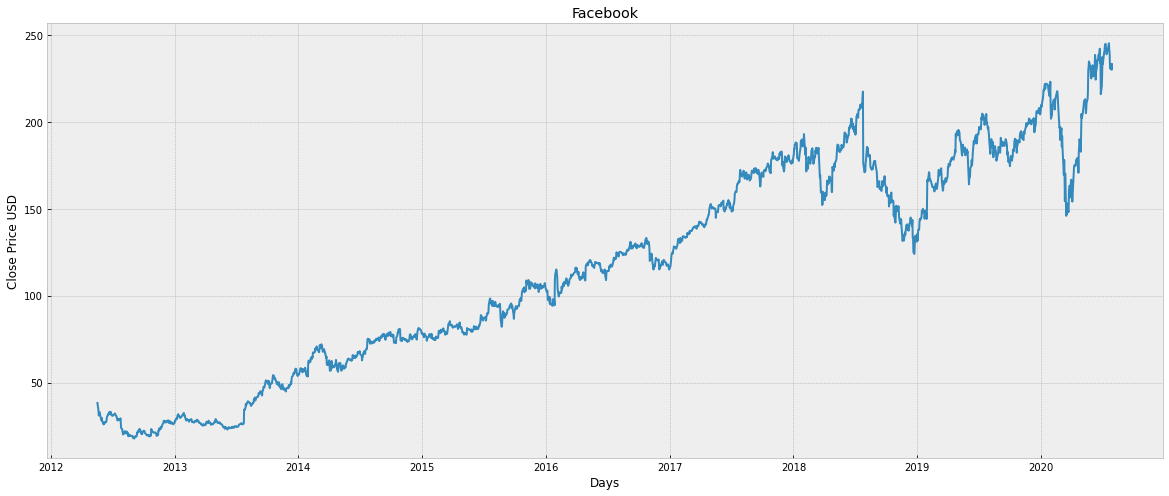

In [4]:
## Plot Close Price data ###
plt.figure(figsize=(20,8))
plt.title('Facebook')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Adj Close'])
# Show Chart
plt.show()


In [7]:
## Create a variable to predict 'x' days out into the future ###
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,NaN
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,NaN
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,NaN
2020-07-29,231.139999,233.699997,230.309998,233.289993,233.289993,13588300,NaN


In [8]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days ###
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[4.20499992e+01 4.50000000e+01 3.80000000e+01 3.82299995e+01
  3.82299995e+01 5.73576400e+08]
 [3.65299988e+01 3.66599998e+01 3.30000000e+01 3.40299988e+01
  3.40299988e+01 1.68192700e+08]
 [3.26100006e+01 3.35900002e+01 3.09400005e+01 3.10000000e+01
  3.10000000e+01 1.01786600e+08]
 ...
 [2.37789993e+02 2.40830002e+02 2.35550003e+02 2.38789993e+02
  2.38789993e+02 3.00813000e+07]
 [2.38559998e+02 2.40699997e+02 2.36910004e+02 2.39220001e+02
  2.39220001e+02 1.89178000e+07]
 [2.41279999e+02 2.45190002e+02 2.39860001e+02 2.42240005e+02
  2.42240005e+02 2.40179000e+07]]


In [9]:
# Create the target fata set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days ###
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 32.06000137  33.09999847  32.22999954 ... 233.5        230.11999512
 233.28999329]


In [10]:
## Split the data into 70% training and 30% testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
#### Create the linear regression model ####
lr = LinearRegression().fit(x_train, y_train)

In [12]:
## Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2.13270004e+02, 2.20490005e+02, 2.12830002e+02, 2.16880005e+02,
        2.16880005e+02, 3.18432000e+07],
       [2.23500000e+02, 2.31339996e+02, 2.23190002e+02, 2.29970001e+02,
        2.29970001e+02, 5.01629000e+07],
       [2.34720001e+02, 2.37199997e+02, 2.31199997e+02, 2.31389999e+02,
        2.31389999e+02, 4.77826000e+07],
       [2.31509995e+02, 2.35990005e+02, 2.28740005e+02, 2.34910004e+02,
        2.34910004e+02, 3.39256000e+07],
       [2.39770004e+02, 2.40899994e+02, 2.31669998e+02, 2.32199997e+02,
        2.32199997e+02, 3.31783000e+07],
       [2.29070007e+02, 2.30559998e+02, 2.21130005e+02, 2.29139999e+02,
        2.29139999e+02, 3.46976000e+07],
       [2.24300003e+02, 2.31630005e+02, 2.24000000e+02, 2.25460007e+02,
        2.25460007e+02, 2.93772000e+07],
       [2.25199997e+02, 2.27490005e+02, 2.22880005e+02, 2.25089996e+02,
        2.25089996e+02, 2.33225000e+07],
       [2.24589996e+02, 2.32440002e+02, 2.23500000e+02, 2.31910004e+02,
        2.31910004e+02, 

In [13]:
## Show the model linear regression prediction
lr_regression = lr.predict(x_future)
print(lr_regression)

[223.35844974 235.59491802 232.63361092 239.00873474 239.34466337
 236.54896121 231.64866401 225.57296046 240.43551123 235.82221896
 229.65503859 231.06713175 234.04650629 231.16171628 247.1094249
 238.56350798 232.87340542 233.06225539 241.37912871 237.21826222
 237.75014149 234.92785775 239.38990976 237.75534797 243.25397246]


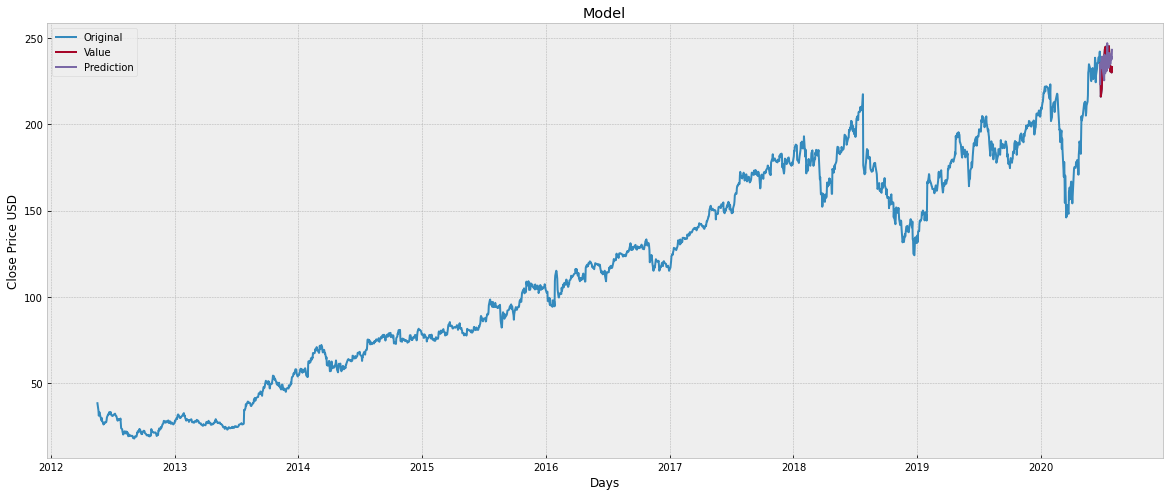

In [16]:
## Visualize the data from Linear regression model 
predictions = lr_regression

valid = df[X.shape[0]:]
valid['Prediction'] = predictions 
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Prediction']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()

<Figure size 1440x576 with 0 Axes>

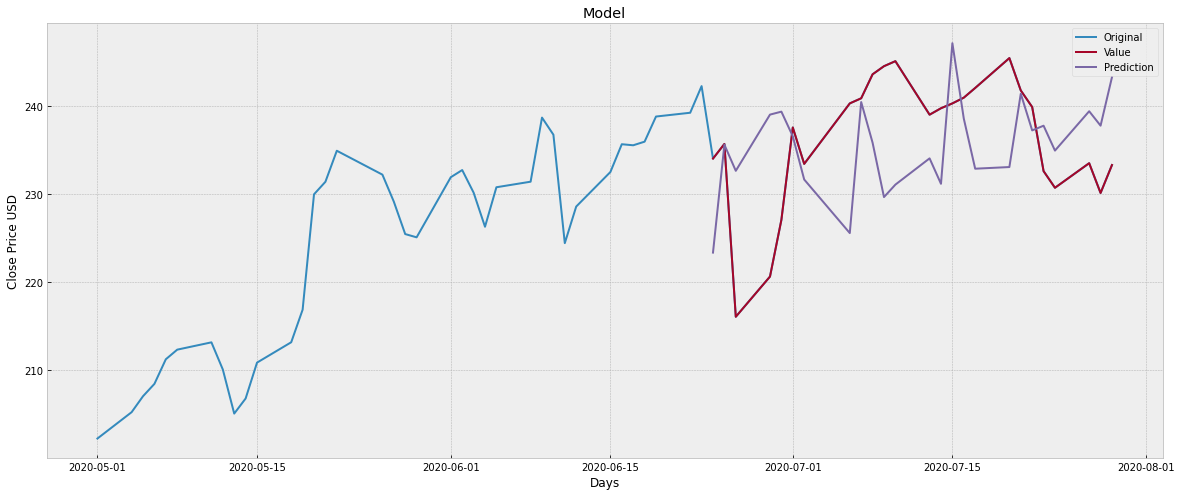

In [19]:
## Zoom Visualized from Linear regression model data
plt.figure(figsize=(20,8))

predictions = lr_regression

valid = df[X.shape[0]:]
valid['Prediction'] = predictions 
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Adj Close'][2000:])
plt.plot(valid[['Adj Close', 'Prediction']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()